In [9]:
#데이터 만들어주는 라이브러리
from sklearn.datasets import make_blobs

#중심점 설정 > 데이터 생성을  위한 > dbscan에 설정하는 것은 아님.
centers = [[1, 1], [-1, -1], [1, -1]]

# 실습용 데이터 생성하기
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)
 
X.shape, labels_true.shape

((750, 2), (750,))

In [10]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[ 0.49426097,  1.45106697],
       [-1.42808099, -0.83706377],
       [ 0.33855918,  1.03875871],
       ...,
       [-0.05713876, -0.90926105],
       [-1.16939407,  0.03959692],
       [ 0.26322951, -0.92649949]])

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics


db = DBSCAN(eps=0.3, min_samples=10)#eps는 경계를 얼마나 명확하게할꺼냐임
labels = db.fit_predict(X_scaled)
labels #여기서 음수는 noise임 밀도기반이다 보니 선택되지 못한애들
#0,1,2등의 양수는 잘 군집화된것임.


array([ 0,  1,  0,  2,  0,  1,  1,  2,  0,  0,  1,  1,  1,  2,  1,  0, -1,
        1,  1,  2,  2,  2,  2,  2,  1,  1,  2,  0,  0,  2,  0,  1,  1,  0,
        1,  0,  2,  0,  0,  2,  2,  1,  1,  1,  1,  1,  0,  2,  0,  1,  2,
        2,  1,  1,  2,  2,  1,  0,  2,  1,  2,  2,  2,  2,  2,  0,  2,  2,
        0,  0,  0,  2,  0,  0,  2,  1, -1,  1,  0,  2,  1,  1,  0,  0,  0,
        0,  1,  2,  1,  2,  2,  0,  1,  0,  1, -1,  1,  1,  0,  0,  2,  1,
        2,  0,  2,  2,  2,  2, -1,  0, -1,  1,  1,  1,  1,  0,  0,  1,  0,
        1,  2,  1,  0,  0,  1,  2,  1,  0,  0,  2,  0,  2,  2,  2,  0, -1,
        2,  2,  0,  1,  0,  2,  0,  0,  2,  2, -1,  2,  1, -1,  2,  1,  1,
        2,  2,  2,  0,  1,  0,  1,  0,  1,  0,  2,  2, -1,  1,  2,  2,  1,
        0,  1,  2,  2,  2,  1,  1,  2,  2,  0,  1,  2,  0,  0,  2,  0,  0,
        1,  0,  1,  0,  1,  1,  2,  2,  0,  0,  1,  1,  2,  1,  2,  2,  2,
        2,  0,  2,  0,  2,  2,  0,  2,  2,  2,  0,  0,  1,  1,  1,  2,  2,
        2,  2,  1,  2,  2

In [24]:
#생선된 클러스터의 개수
unique_labels=set(labels)
unique_labels

{np.int64(-1), np.int64(0), np.int64(1), np.int64(2)}

In [25]:
#노이즈의 개수
list(labels).count(-1)

18

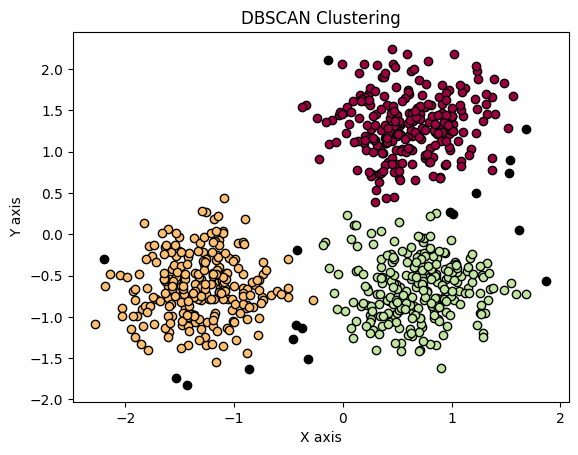

In [26]:
#결과 시각화
 # 색상 (스펙트럼) 설정
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
 
for k, col in zip(unique_labels, colors):
    if k == -1:
        # 노이즈는 검은색으로 표시
        col = [0, 0, 0, 1]
 
    # 현재 클러스터(k)에 속하는 데이터 마스크 설정
    class_member_mask = (labels == k)
    # 현재 클러스터(k)에 속하는 데이터 포인트 추출
    xy = X_scaled[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)
 
plt.title('DBSCAN Clustering')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()